In [1]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# dataset_name = 'prepared_facebook_data'
# folder_name = 'facebook_comm_vol'
# dataset_name ='house_prices'
# folder_name = 'boston_house_prices'
# dataset_name = 'energy_consumption'
# folder_name = 'energy_consumption'
dataset_name = 'physics'
folder_name = 'physics'
first_test_path= '../other_data_experiments/{}/first experiment/'.format(folder_name)
second_test_path= '../other_data_experiments/{}/second experiment/'.format(folder_name)
DIR_WITH_GRAPHS='../other_data_experiments/{}/'.format(folder_name)+"graphs/"

In [3]:
plt.rcParams.update({'font.size': 12})

In [4]:
json_file= open(second_test_path + "scores_info.txt", "r") 
scores_info = json.load(json_file)
json_file= open(second_test_path + "iters_info.txt", "r") 
iters_info = json.load(json_file)

In [5]:
iters_info

{'GRS_10': {'mean': 569.2, 'std': 96.27543819687345},
 'RS_10': {'mean': 18.2, 'std': 4.237924020083418}}

In [6]:
order = ['GRS_10', 'RS_10']#, 'GRS_25', 'RS_25', 'GRS_50', 'RS_50']

In [7]:
sorted_dict_iters = {}
sorted_dict_scores = {}
for k in order:
    sorted_dict_iters[k] = iters_info[k]
    sorted_dict_scores[k] = scores_info[k]
iters_info = sorted_dict_iters
scores_info = sorted_dict_scores    

In [8]:
# !!!!!!


# facebook
# scores_info['GRS'] = {'mean': 0.6676, 'std': 0.0012}
# scores_info['RS'] = {'mean': 0.6676, 'std': 0.0018} #from first experiment 
# boston
# scores_info['GRS'] = {'mean': 0.6944366108086347, 'std': 0.002621311802283841} #from first experiment 
# scores_info['RS'] = {'mean': 0.6925651574756537, 'std': 0.0028240956193657176}
# energy
# scores_info['GRS'] = {'mean': 0.6858301150851477, 'std': 0.001570272280096309}
# scores_info['RS'] = {'mean': 0.6925741735030887, 'std': 0.009574347405305867} #from first experiment 
# physics
scores_info['GRS'] = {'mean': 0.9005234945275129, 'std': 0.00040566927710077076}
scores_info['RS'] = {'mean': 0.8990713173748913, 'std': 0.00037148086603514457} #from first experiment 
grid_and_default = (0.6648, 0.6362)

In [9]:
max_score = max(max(grid_and_default), scores_info['GRS']['mean'], scores_info['RS']['mean'])

In [10]:
iters_labels = list(iters_info.keys())
iters_info = list(iters_info.values())

means_iters = []
std_iters = []

for experiment in iters_info:
    means_iters.append(experiment['mean'])
    std_iters.append(experiment['std'])

In [11]:
scores_labels = list(scores_info.keys())
scores_info = list(scores_info.values())

means_scores = []
std_scores = []


z = 1.96
n = 10
for experiment in scores_info:
    means_scores.append(experiment['mean'])
    std_scores.append(experiment['std'])

In [12]:
conf_std = (np.array(std_scores)*z)/np.sqrt(n)
upper_conf = means_scores + conf_std
lower_conf = means_scores - conf_std
confidence = pd.DataFrame([scores_labels, lower_conf, upper_conf]).T
confidence.columns = ["method", "lower_bound", "upper_bound"]

In [13]:
confidence.sort_values("method").set_index("method")

,lower_bound,upper_bound
method,,
GRS,0.900272,0.900775
GRS_10,0.900286,0.900824
RS,0.898841,0.899302
RS_10,0.896472,0.897467


In [14]:
def autolabel(rects, add=0):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()+add
        ax.annotate('{}'.format(round(height-add,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

In [15]:
means_iters

[569.2, 18.2]

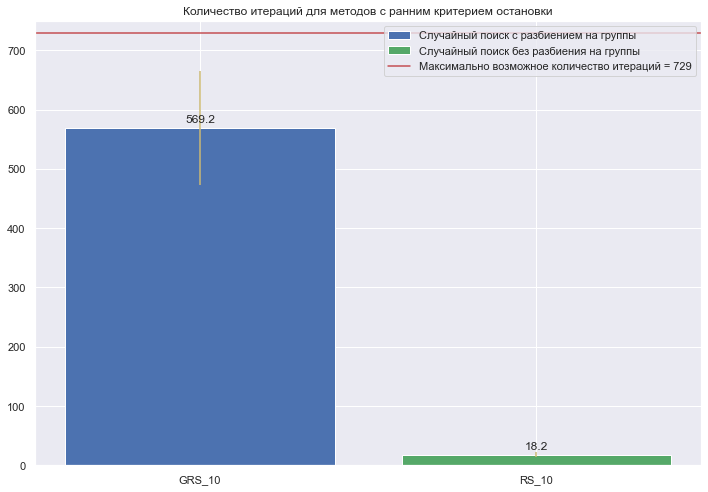

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(range(len(iters_labels)), means_iters,
        yerr=std_iters, align="center", ecolor = 'y', color = ('b','g'))

ax.set_xticks(range(0,len(iters_labels)))
ax.set_xticklabels(iters_labels)

line = ax.axhline(729, color='r', label = 'max_iter_num')
autolabel(rects1)
ax.set_title('Количество итераций для методов с ранним критерием остановки')
plt.legend(handles= (rects1[::2],rects1[1::2],line),
           labels = ('Случайный поиск с разбиением на группы', 
                     'Случайный поиск без разбиения на группы', 
                     'Максимально возможное количество итераций = 729'),
           loc = 'upper right')
ax.set_ylim(0, 750)
fig.tight_layout()
plt.savefig(DIR_WITH_GRAPHS+"iter_comp.jpg")
plt.show()

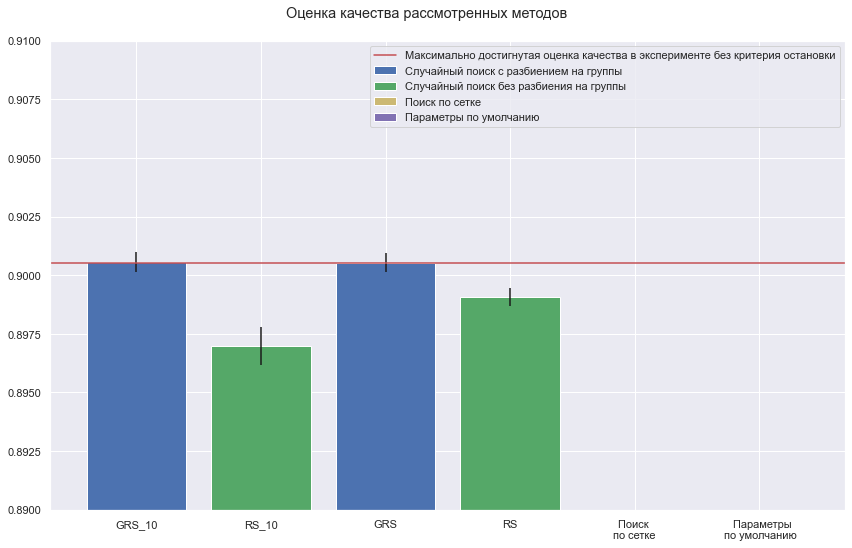

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(12, 8))
full_scores_labels = scores_labels.copy()
full_scores_labels.extend(['Поиск \nпо сетке', '  Параметры\n по умолчанию'])


rects3 = axs.bar(range(len(scores_labels)), means_scores,
        yerr=std_scores, align="center", ecolor = 'k', color = ('b','g'))

rects3_and_half = axs.bar(range(len(scores_labels), 
                                   len(scores_labels)+len(grid_and_default)), 
                             grid_and_default,
                             align="center", color = ('y', 'm'))

axs.set_xticks(range(0,len(full_scores_labels)))
axs.set_xticklabels(full_scores_labels)
line = axs.axhline(max_score, color='r')
axs.set_ylim(0.89, 0.91)

plt.legend(handles= (line, rects3[::2], rects3[1::2], 
                     rects3_and_half[0], rects3_and_half[1]),
           labels = ('Максимально достигнутая оценка качества в эксперименте без критерия остановки', 
                     'Случайный поиск с разбиением на группы', 
                     'Случайный поиск без разбиения на группы', 
                    'Поиск по сетке', 'Параметры по умолчанию'),
           loc = 'best')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.suptitle('Оценка качества рассмотренных методов')
plt.savefig(DIR_WITH_GRAPHS+"scores_comp.jpg")
plt.show()